# 2022 NZMSA Data Science Submission.

In [1]:
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt


%matplotlib inline

# Exploratory Data Analysis.

In [2]:
dataset = pd.read_csv("weather-data.csv",parse_dates=True)
dataset.head() # Show the first five results.

,station,valid,tmpc,dwpc,relh,sknt,gust,peak_wind_drct
0,NZAA,2015-01-01 00:00,21.0,11.0,52.77,15.0,NaN,NaN
1,NZAA,2015-01-01 00:30,21.0,10.0,49.37,16.0,NaN,NaN
2,NZAA,2015-01-01 01:00,21.0,12.0,56.38,16.0,NaN,NaN
3,NZAA,2015-01-01 01:30,21.0,13.0,60.21,16.0,NaN,NaN
4,NZAA,2015-01-01 02:00,21.0,12.0,56.38,16.0,NaN,NaN


In [3]:
#Describe the data using Mean, Std, and the 25th and 75th percentiles
dataset.describe()

,tmpc,dwpc,relh,sknt,gust,peak_wind_drct
count,103678.000000,103678.000000,103593.000000,103704.000000,1203.000000,0.0
mean,15.811503,12.115772,79.782307,8.919029,30.962594,NaN
std,4.235197,3.738005,12.562199,5.348379,6.319510,NaN
min,2.000000,-2.000000,29.230000,0.000000,13.000000,NaN
25%,13.000000,9.000000,71.450000,5.000000,27.000000,NaN
50%,16.000000,12.000000,81.990000,8.000000,31.000000,NaN
75%,19.000000,15.000000,88.180000,12.000000,35.000000,NaN
max,29.000000,23.000000,100.000000,42.000000,56.000000,NaN


Here is a visual representation of the data spread

tmpc                 AxesSubplot(0.125,0.536818;0.227941x0.343182)
dwpc              AxesSubplot(0.398529,0.536818;0.227941x0.343182)
relh              AxesSubplot(0.672059,0.536818;0.227941x0.343182)
sknt                    AxesSubplot(0.125,0.125;0.227941x0.343182)
gust                 AxesSubplot(0.398529,0.125;0.227941x0.343182)
peak_wind_drct       AxesSubplot(0.672059,0.125;0.227941x0.343182)
dtype: object

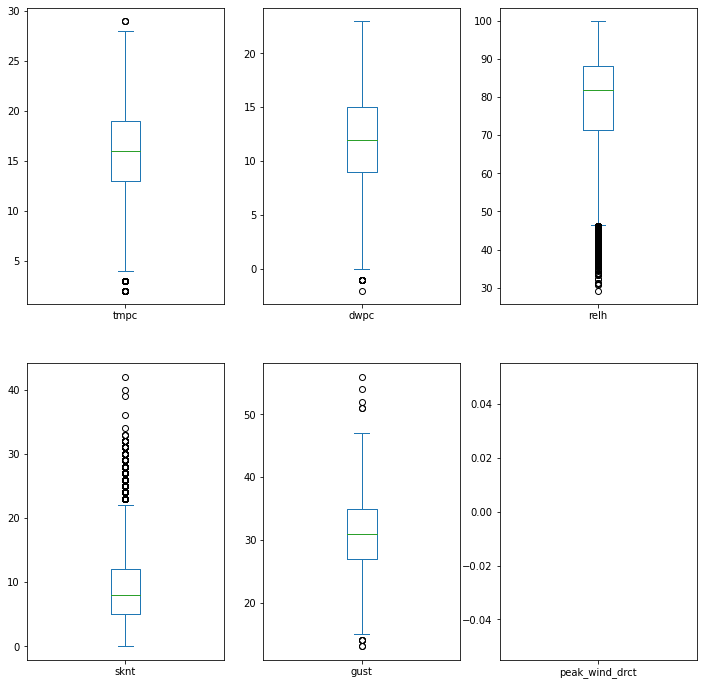

In [4]:
dataset.plot(figsize=(12,12),kind='box', subplots=True, layout=(2,3), sharex=False, sharey=False)

sknt has the highest count number, followed closely by tmpc and dwpc which is then followed closely by relh, and then gust. peak_wind_drct has a count of zero and therefore no data.

In [5]:
dataset.info()
dataset.duplicated().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103713 entries, 0 to 103712
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0    station        103713 non-null  object 
 1   valid           103713 non-null  object 
 2   tmpc            103678 non-null  float64
 3   dwpc            103678 non-null  float64
 4   relh            103593 non-null  float64
 5   sknt            103704 non-null  float64
 6   gust            1203 non-null    float64
 7   peak_wind_drct  0 non-null       float64
dtypes: float64(6), object(2)
memory usage: 6.3+ MB


0

This confirms that peak_wind_drct is completely null. It also shows that all of the data columns contain null values in different rows.
The valid column is also treated as an object but needs to be a dateTime.
I am also checking for any duplicates within the data

In [6]:
dataset['valid'] = pd.to_datetime(dataset['valid'])
dataset.index = dataset['valid']
#dataset.reset_index()
#dataset.index.to_pydatetime()
#del dataset['valid']
dataset.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 103713 entries, 2015-01-01 00:00:00 to 2020-12-30 23:30:00
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0    station        103713 non-null  object        
 1   valid           103713 non-null  datetime64[ns]
 2   tmpc            103678 non-null  float64       
 3   dwpc            103678 non-null  float64       
 4   relh            103593 non-null  float64       
 5   sknt            103704 non-null  float64       
 6   gust            1203 non-null    float64       
 7   peak_wind_drct  0 non-null       float64       
dtypes: datetime64[ns](1), float64(6), object(1)
memory usage: 7.1+ MB


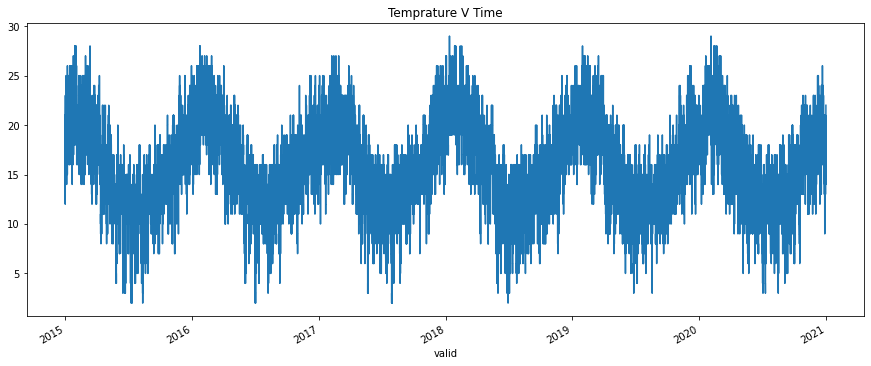

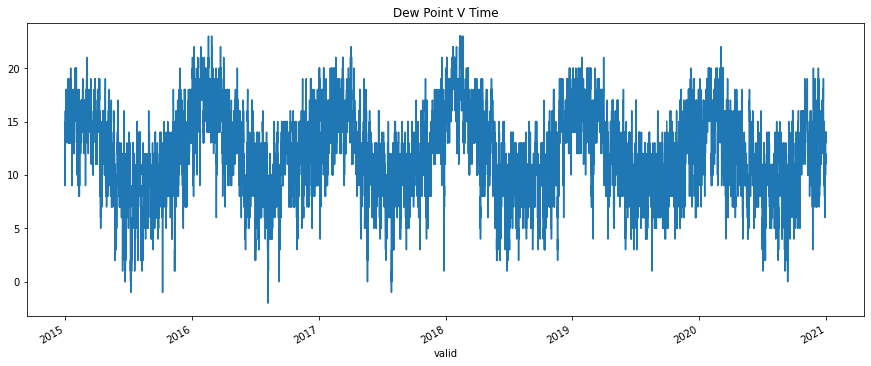

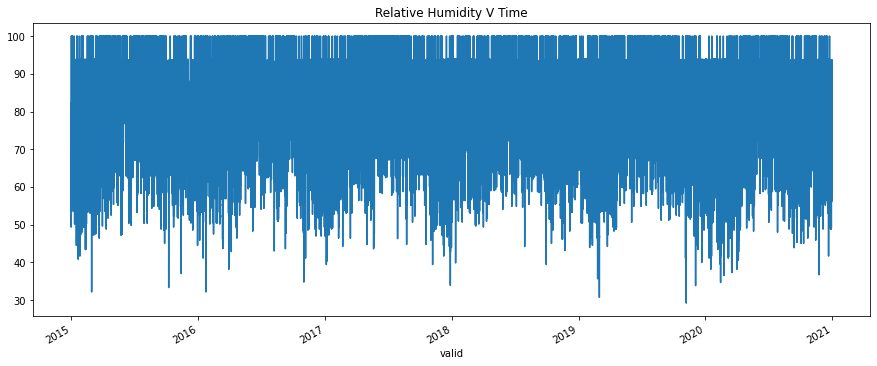

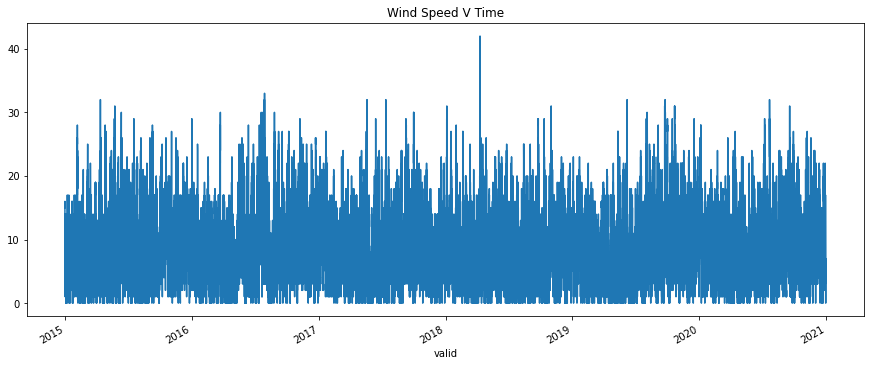

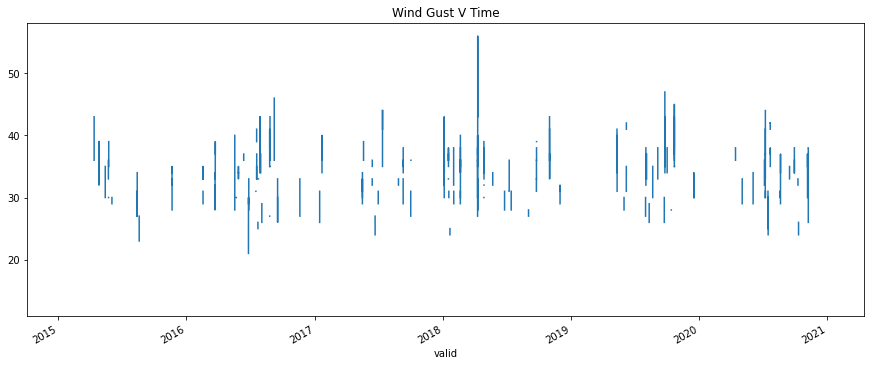

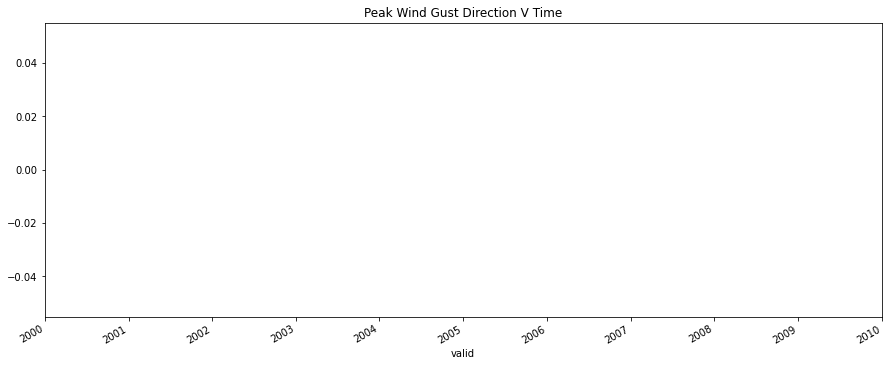

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 103713 entries, 2015-01-01 00:00:00 to 2020-12-30 23:30:00
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0    station        103713 non-null  object        
 1   valid           103713 non-null  datetime64[ns]
 2   tmpc            103678 non-null  float64       
 3   dwpc            103678 non-null  float64       
 4   relh            103593 non-null  float64       
 5   sknt            103704 non-null  float64       
 6   gust            1203 non-null    float64       
 7   peak_wind_drct  0 non-null       float64       
dtypes: datetime64[ns](1), float64(6), object(1)
memory usage: 7.1+ MB


In [7]:
dataset["tmpc"].plot(figsize=(15, 6))
plt.title("Temprature V Time")
plt.show()
dataset["dwpc"].plot(figsize=(15, 6))
plt.title("Dew Point V Time")
plt.show()
dataset["relh"].plot(figsize=(15, 6))
plt.title("Relative Humidity V Time")
plt.show()
dataset["sknt"].plot(figsize=(15, 6))
plt.title("Wind Speed V Time")
plt.show()
dataset["gust"].plot(figsize=(15, 6))
plt.title("Wind Gust V Time")
plt.show()
dataset["peak_wind_drct"].plot(figsize=(15, 6))
plt.title("Peak Wind Gust Direction V Time")
plt.show()
dataset.info()

Within the above graphs we can see a very strong corralation between the date/time and numerous columns, such as temprature, dew point, with less prominant corralation with Wind Speed and Relative Humidity as it cycles through the seasons of the year.   
This will be usefull for prediciting the temprature and dew point for future dates.

Below is a correlation heatmap of the different columns.


<AxesSubplot:>

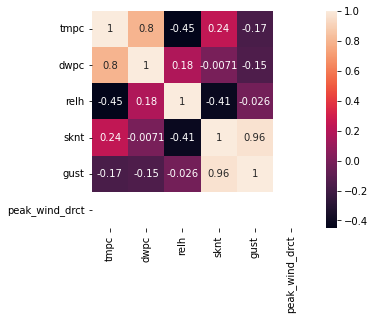

In [8]:

sns.heatmap(dataset.corr(), annot=True, square=True)

Correlation is seen the closer the values are to 1 and -1.   
There are multiple observed correlations with tmpc and dwpc & relh.  
There are also correlations with gust and sknt, and between sknt and relh.  
There are two strong correlations, being between tmpc & dwpc and sknt & gust.  
There are moderate correlations with tmpc & relh and sknt & relh.  

C:\Users\fakec\AppData\Local\Temp\ipykernel_10840\2159406809.py:26: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  figure.show()


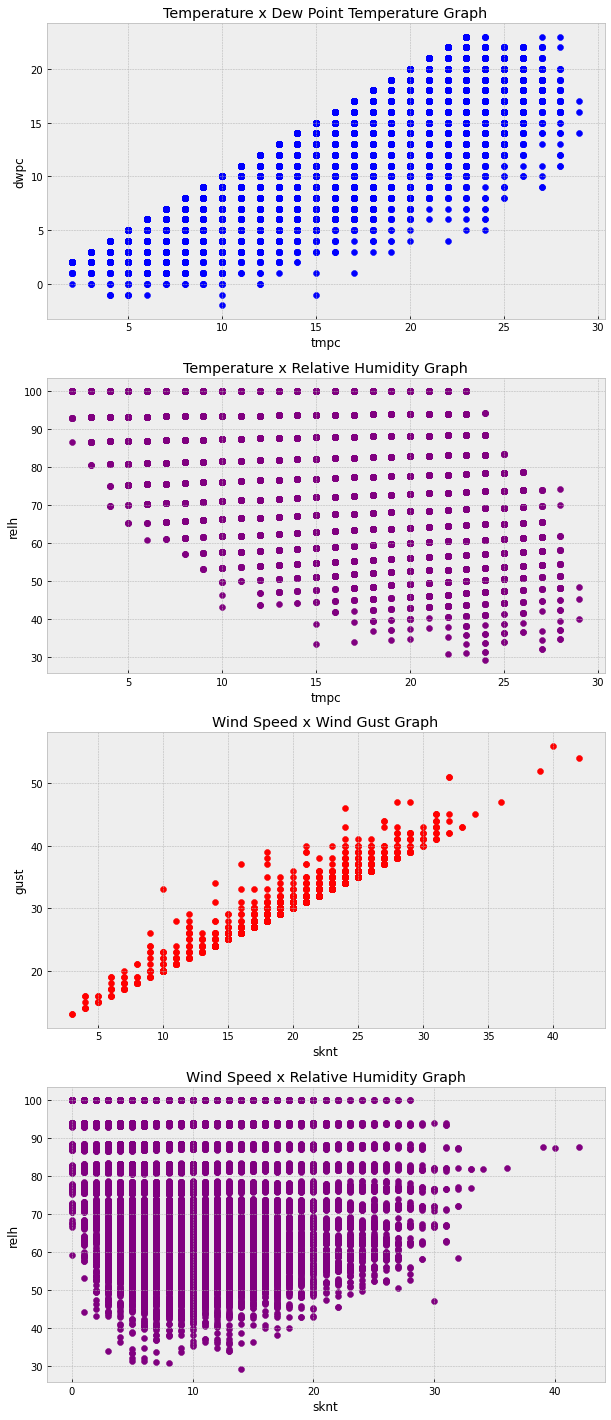

In [9]:
plt.style.use("bmh")
figure, (axis1, axis2, axis3, axis4) = plt.subplots(nrows=4, ncols=1,squeeze=True)

axis1.scatter(dataset["tmpc"], dataset["dwpc"], color="blue",)
axis1.set_title("Temperature x Dew Point Temperature Graph")
axis1.set_xlabel("tmpc")
axis1.set_ylabel("dwpc")

axis2.scatter(dataset["tmpc"], dataset["relh"], color="purple")
axis2.set_title("Temperature x Relative Humidity Graph")
axis2.set_xlabel("tmpc")
axis2.set_ylabel("relh")

axis3.scatter(dataset["sknt"], dataset["gust"], color="red")
axis3.set_title("Wind Speed x Wind Gust Graph")
axis3.set_xlabel("sknt")
axis3.set_ylabel("gust")

axis4.scatter(dataset["sknt"], dataset["relh"], color="purple")
axis4.set_title("Wind Speed x Relative Humidity Graph")
axis4.set_xlabel("sknt")
axis4.set_ylabel("relh")


figure.set_size_inches(10,25)
figure.show()

# Data Processing

The First Thing we are going to do is drop the Wind gust and wind gust direction columns as there are many null values within these columns.
We are also going to delete the station column as it is the same value for the entire dataset

In [10]:
del dataset['gust']
del dataset['peak_wind_drct']
del dataset[' station']


Then I am going to drop the rows that contain null values in the remaining dataset

In [11]:
dataset.info()
dataset = dataset.dropna()
dataset.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 103713 entries, 2015-01-01 00:00:00 to 2020-12-30 23:30:00
Data columns (total 5 columns):
 #   Column  Non-Null Count   Dtype         
---  ------  --------------   -----         
 0   valid   103713 non-null  datetime64[ns]
 1   tmpc    103678 non-null  float64       
 2   dwpc    103678 non-null  float64       
 3   relh    103593 non-null  float64       
 4   sknt    103704 non-null  float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 4.7 MB
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 103584 entries, 2015-01-01 00:00:00 to 2020-12-30 23:30:00
Data columns (total 5 columns):
 #   Column  Non-Null Count   Dtype         
---  ------  --------------   -----         
 0   valid   103584 non-null  datetime64[ns]
 1   tmpc    103584 non-null  float64       
 2   dwpc    103584 non-null  float64       
 3   relh    103584 non-null  float64       
 4   sknt    103584 non-null  float64       
dtypes: datetime64[ns](

Now all the datset only has complete rows, which is going to bge usefull for training our model.  
Now we are going to split the model into ita training and testing datasets.

In [12]:
import matplotlib.dates as dt
#dataset.index.to_pydatetime()
#dataset['valid'] = pd.to_numeric(dataset['valid'])


As this is a time series problem, we need to divide the training data set by time periods.

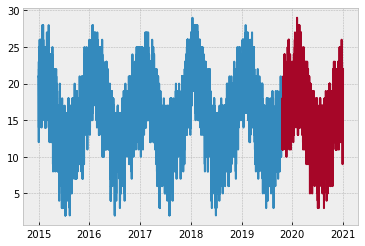

In [27]:
X = dataset['valid']
y = dataset['tmpc']
min_date = dataset.valid.min()
max_date = dataset.valid.max()
train_percent = .80
time_between = max_date - min_date
train_cutoff = min_date + train_percent*time_between
train_ds = dataset[dataset.valid <= train_cutoff]
test_ds = dataset[dataset.valid > train_cutoff]

y_train = train_ds['tmpc']
#y_train.reset_index(drop=True, inplace=True)
y_test = test_ds['tmpc']
#y_test.reset_index(drop=True, inplace=True)
X_train = train_ds[['valid']]
X_test = test_ds[['valid']]
plt.plot(y_train)
plt.plot(y_test)

In [14]:
#from sklearn.model_selection import TimeSeriesSplit
#X_train, X_test, y_train, y_test = TimeSeriesSplit( X, y, test_size=0.2)
X_train.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 82596 entries, 2015-01-01 00:00:00 to 2019-10-19 18:30:00
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   valid   82596 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 1.3 MB


In [15]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 20988 entries, 2019-10-19 19:00:00 to 2020-12-30 23:30:00
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   valid   20988 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 327.9 KB


In [16]:
y_train.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 82596 entries, 2015-01-01 00:00:00 to 2019-10-19 18:30:00
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   tmpc    82596 non-null  float64
dtypes: float64(1)
memory usage: 1.3 MB


In [17]:
y_test.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 20988 entries, 2019-10-19 19:00:00 to 2020-12-30 23:30:00
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   tmpc    20988 non-null  float64
dtypes: float64(1)
memory usage: 327.9 KB


Now the model is ready to Train

# Data Modelling

In [18]:
# An exhaustive list of models can be found in sci-kit learn in this link: https://scikit-learn.org/stable/supervised_learning.html
# The url takes you to supervised learning which is what you will be dealing with for this phase.

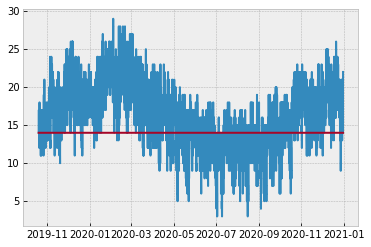

In [28]:
from sklearn.tree import DecisionTreeRegressor
import numpy

tree_model = DecisionTreeRegressor()
tree_model.fit(X_train, y_train)
y1 = tree_model.predict(X_test)
plt.plot(X_test,y_test)
plt.plot(X_test,y1)


Here is the dataset for the next month

c:\Users\fakec\Desktop\MSA PHASE 2\DataScience\datascience\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


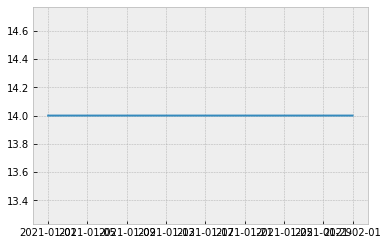

In [37]:
nextMonth = pd.date_range(start="2021-01-01T00:00:00.000Z",end="2021-02-01T00:00:00.000Z", freq="0.5H")
nextMonth = nextMonth.array.reshape(-1, 1)
pred = tree_model.predict(nextMonth)
plt.plot(nextMonth,pred)

The Predicted Model indicates that there will be a temprature of 14 Degrees Celcious the entire month

# Conclusion

* Comment on your model performance.
* Anything interesting about the data analysis.